# Spherical Harmonics

$$
Y_{\ell}^m(\theta, \phi) = \sqrt{\frac{(2\ell + 1)(\ell - m)!}{4\pi (\ell + m)!}} P_{\ell}^m(\cos \theta) e^{im\phi}
$$

<br>
<div style="text-align: center">
    <img src="arts/real_sh.gif" />
</div>


In [5]:
import math


# Function to convert Cartesian to spherical coordinates
def cartesian_to_spherical(x, y, z):
    r = math.sqrt(x ** 2 + y ** 2 + z ** 2)
    theta = math.atan2(y, x)  # azimuthal angle
    phi = math.acos(z / r) if r != 0 else 0  # polar angle, with a check for r = 0
    return r, theta, phi


# Cartesian coordinates of the points
cartesian_points = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 1), (-1, -1, 1)]

# Convert to spherical coordinates
spherical_points = [cartesian_to_spherical(*point) for point in cartesian_points]
spherical_points  # Display spherical coordinates (r, theta, phi) of each point



[(1.0, 0.0, 1.5707963267948966),
 (1.0, 1.5707963267948966, 1.5707963267948966),
 (1.0, 0.0, 0.0),
 (1.7320508075688772, 0.7853981633974483, 0.9553166181245092),
 (1.7320508075688772, -2.356194490192345, 0.9553166181245092)]

In [6]:
from scipy.special import sph_harm, lpmv
import numpy as np


# Function to calculate spherical harmonics values for given l, m, and spherical coordinates
def calculate_spherical_harmonics(l, m, theta, phi):
    # Spherical harmonics are typically defined with theta as the polar angle and phi as the azimuthal angle
    return sph_harm(m, l, phi, theta)




# Define l and m values for spherical harmonics
l_values = [0, 1]  # Degrees
m_values = [-1, 0, 1]  # Orders

# Calculate spherical harmonics values for each point
sh_values = {}
for point_idx, (r, theta, phi) in enumerate(spherical_points):
    sh_values[point_idx + 1] = {}
    for l in l_values:
        print()
        for m in m_values:
            if abs(m) <= l:  # Valid m values for each l
                sh_key = f"Y_{l}^{m}"
                sh_values[point_idx + 1][sh_key] = calculate_spherical_harmonics(l, m, theta, phi)
                print(sh_key, calculate_spherical_harmonics(l, m, theta, phi))

#sh_values  # Display spherical harmonics values for each point




Y_0^0 (0.28209479177387814+0j)

Y_1^-1 0j
Y_1^0 (0.4886025119029199+0j)
Y_1^1 (-0+0j)

Y_0^0 (0.28209479177387814+0j)

Y_1^-1 (2.115541521371041e-17-0.3454941494713355j)
Y_1^0 (-0+0j)
Y_1^1 (-2.115541521371041e-17-0.3454941494713355j)

Y_0^0 (0.28209479177387814+0j)

Y_1^-1 0j
Y_1^0 (0.4886025119029199+0j)
Y_1^1 (-0+0j)

Y_0^0 (0.28209479177387814+0j)

Y_1^-1 (0.1410473958869391-0.19947114020071635j)
Y_1^0 (0.34549414947133544+0j)
Y_1^1 (-0.1410473958869391-0.19947114020071635j)

Y_0^0 (0.28209479177387814+0j)

Y_1^-1 (0.1410473958869391-0.19947114020071635j)
Y_1^0 (-0.34549414947133544+0j)
Y_1^1 (-0.1410473958869391-0.19947114020071635j)


# MANUALNE POCITANIE Y

In [6]:
import scipy.special
#import scipy as sci
import numpy as np

l = 4
m = 2
theta, phi = 0.6, 0.75  # Some arbitrary values of angles in radians
Y42 = sph_harm(m, l, phi, theta)
print("scipy y:", Y42)

# manualne zostrojenie
z = np.cos(theta)
P42 = lpmv(m, l, z)
print("legendre polynomial:", P42)

# normalizacia
f = scipy.special.factorial
K_norm = np.sqrt((2 * l + 1) / (4 * np.pi) * f(l - m) / f(l + m))
print("normalization:", K_norm)

y_manual = K_norm * P42 * np.exp(m * phi * 1j)
print("y_manual:", y_manual)
print(y_manual == Y42)

scipy y: (0.02842897832840588+0.40088896207789526j)
legendre polynomial: 9.01048783752695
normalization: 0.044603102903819275
y_manual: (0.02842897832840588+0.40088896207789526j)
True


# ORTHONORAMLITY

In [7]:
import scipy


def dotprod(f, g):
    #Scipy does not directly integrates complex functions.
    #You have to break them down into two integrals of the real and imaginary part
    integrand_r = lambda theta, phi: np.real(f(theta, phi) * np.conj(g(theta, phi)) * np.sin(theta))
    integrand_i = lambda theta, phi: np.imag(f(theta, phi) * np.conj(g(theta, phi)) * np.sin(theta))
    rr = scipy.integrate.dblquad(integrand_r, 0, 2 * np.pi, lambda theta: 0, lambda theta: np.pi)[0]
    ri = scipy.integrate.dblquad(integrand_i, 0, 2 * np.pi, lambda theta: 0, lambda theta: np.pi)[0]
    if np.allclose(rr, 0):
        rr = 0
    if np.allclose(ri, 0):
        ri = 0
    return rr + ri * 1j



In [8]:
# We check the orthogonality of the spherical harmonics:
# Si (l,m) =! (l',m') the inner product must be zero
Y = lambda l, m, theta, phi: sph_harm(m, l, phi, theta)
f = lambda theta, phi: Y(4, 3, theta, phi)
g = lambda theta, phi: Y(4, 2, theta, phi)
dotprod(f, g)

0j

In [9]:
# And, if (l,m) = (l',m') the inner product is one.
f = lambda theta, phi: Y(4, 3, theta, phi)
g = lambda theta, phi: Y(4, 3, theta, phi)
dotprod(f, g)

(1+0j)

# Graficke zobrazenie

In [16]:
l = 4  #degree
m = 2  # order
PHI, THETA = np.mgrid[0:2 * np.pi:200j, 0:np.pi:100j]  #arrays of angular variables
R = np.abs(sph_harm(m, l, PHI, THETA))  #Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

/tmp/ipykernel_15313/1728412311.py:13: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



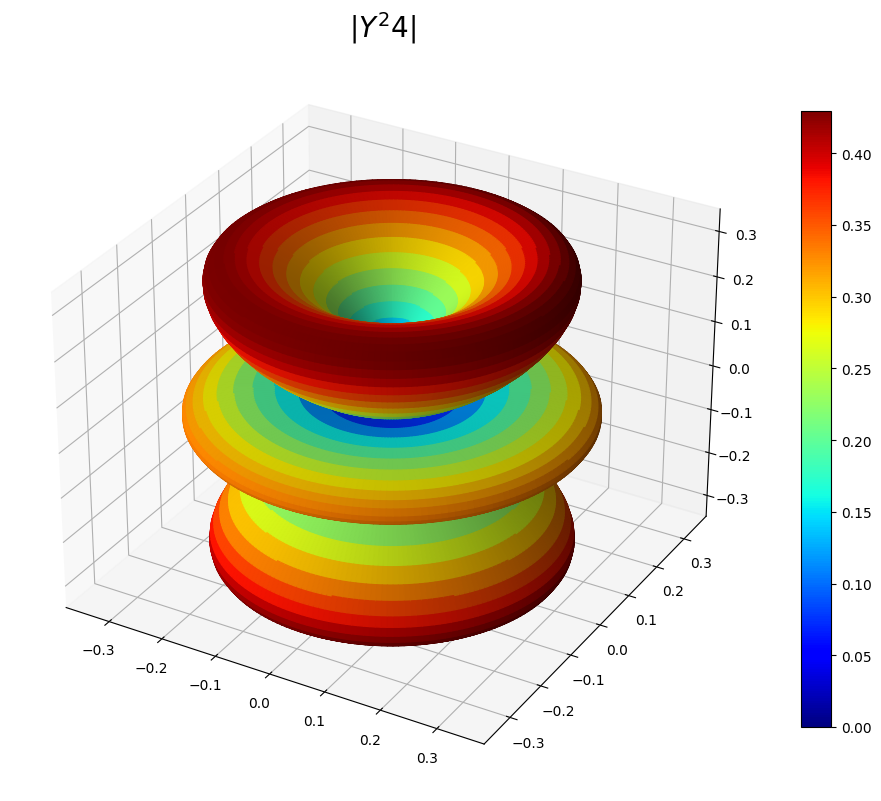

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np  # Assuming you have arrays X, Y, Z, and R defined with numpy

# Your existing code
N = R / R.max()  # Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(12, 10))
im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N))
ax.set_title(r'$|Y^2_ 4|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)  # Assign the unnormalized data array to the mappable
#so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8)


/tmp/ipykernel_15313/4268410360.py:27: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



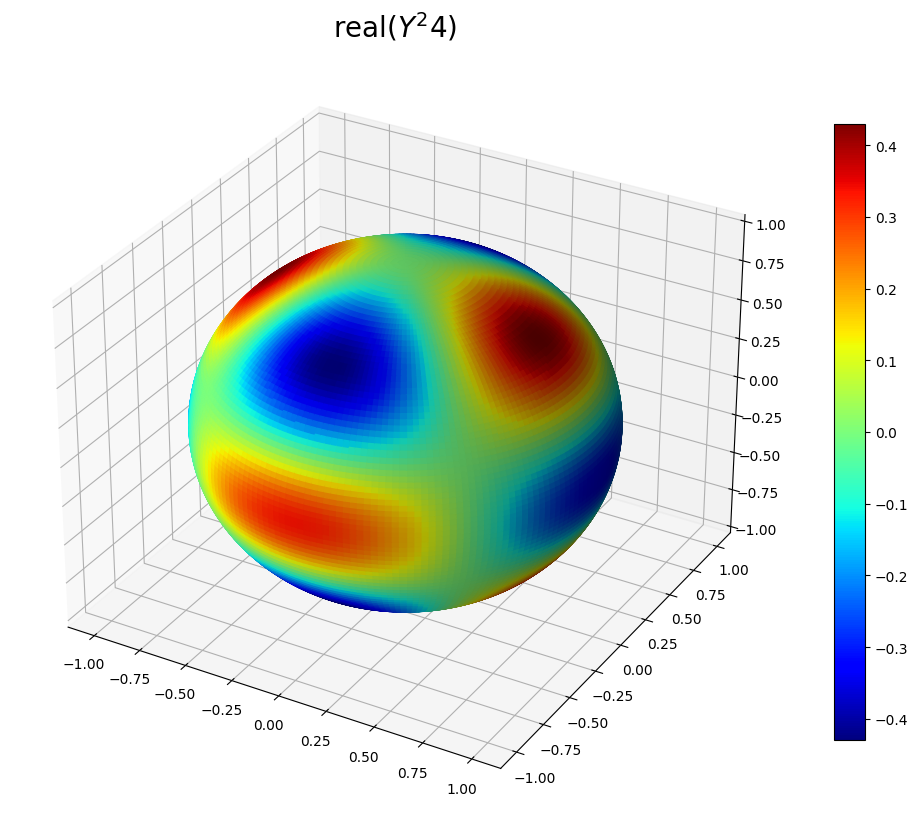

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from scipy.special import sph_harm

l = 4  # degree
m = 2  # order
PHI, THETA = np.mgrid[0:2 * np.pi:200j, 0:np.pi:100j]
R = sph_harm(m, l, PHI, THETA).real


X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)

# X = R * np.sin(THETA) * np.cos(PHI)
# Y = R * np.sin(THETA) * np.sin(PHI)
# Z = R * np.cos(THETA)

norm = colors.Normalize()  # Normalize instance
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(14, 10))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)))
ax.set_title('real$(Y^2_ 4)$', fontsize=20)
m.set_array(R)
fig.colorbar(m, shrink=0.8)



# TOTO ISTE LEN CEZ e3nn

In [9]:
import e3nn

l = 2
irreps_in = e3nn.o3.Irreps("1o")
x_in = irreps_in.randn(100, -1)

sh = e3nn.o3.spherical_harmonics(l, x_in, False)

In [10]:
import plotly.graph_objects as go
import torch

alpha, beta = torch.meshgrid(
    torch.linspace(0.0, 2 * torch.pi, 30),
    torch.linspace(0.0, torch.pi, 30),
    indexing="ij"
)

vectors = e3nn.o3.angles_to_xyz(alpha, beta)  # Vectors on the surface of the sphere

go.Figure([go.Surface(
    x=vectors[..., 0].numpy(),
    y=vectors[..., 1].numpy(),
    z=vectors[..., 2].numpy(),
)])

In [11]:
#out = spherical_harmonic_3(vectors)
l = 8
m = 0
out = e3nn.o3.spherical_harmonics(l, vectors, False)

cmap_bwr = [[0, 'rgb(0,50,255)'], [0.5, 'rgb(200,200,200)'], [1, 'rgb(255,50,0)']]

go.Figure([go.Surface(
    x=vectors[..., 0].numpy(),
    y=vectors[..., 1].numpy(),
    z=vectors[..., 2].numpy(),
    surfacecolor=out[..., m].numpy(),

    colorscale=cmap_bwr, cmin=-0.4, cmax=0.4
)])

In [12]:
# Let's deform the surface of the sphere proportionally to the amplitude of the signal

signal = out[..., m]

go.Figure([go.Surface(
    x=(signal.abs() * vectors[..., 0]).numpy(),
    y=(signal.abs() * vectors[..., 1]).numpy(),
    z=(signal.abs() * vectors[..., 2]).numpy(),
    surfacecolor=signal.numpy(),

    colorscale=cmap_bwr, cmin=-0.4, cmax=0.4
)])

# TOTO ISTE LEN SO SFERICKYMI HARMONIKAMI

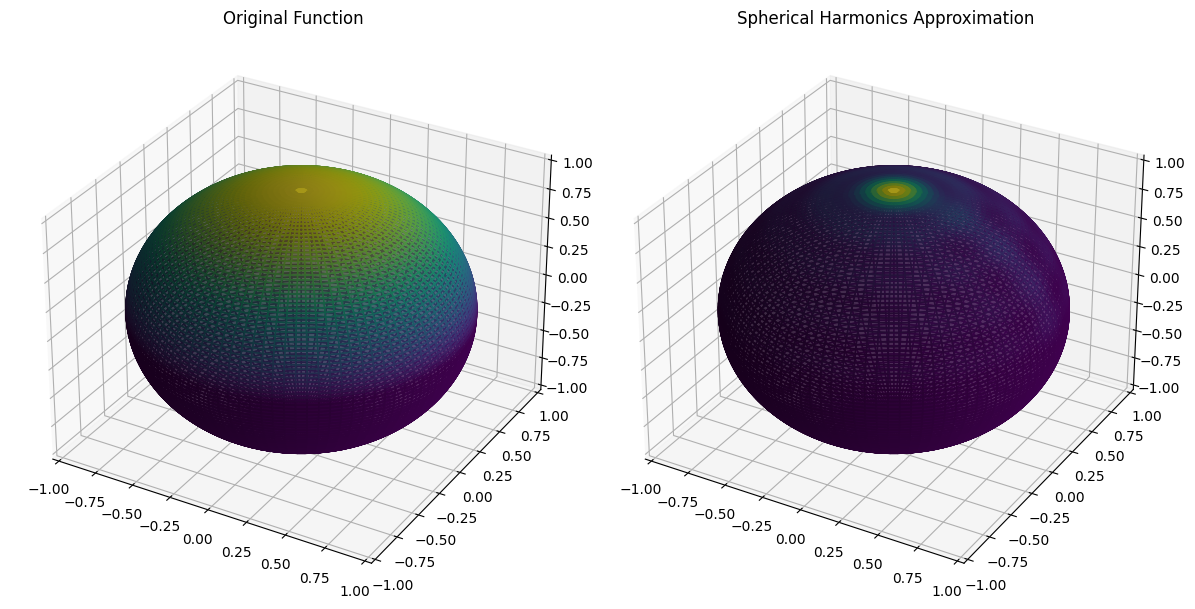

In [1]:
from scipy.special import sph_harm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the grid in spherical coordinates
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)
phi, theta = np.meshgrid(phi, theta)
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Spherical function to approximate: f(theta, phi) = cos(theta)
f = np.cos(theta)

# Degree and order for spherical harmonics approximation
degree = 20
# Recompute spherical harmonics approximation
approximation = np.zeros_like(f)
for l in range(degree+1):
    for m in range(-l, l+1):
        Y_lm = sph_harm(m, l, phi, theta)  # Compute spherical harmonic
        # Compute coefficient (consider only the real part of Y_lm)
        coefficient = np.sum(Y_lm.real * f) / np.sum(Y_lm.real * Y_lm.real)
        approximation += coefficient * Y_lm.real  # Add to approximation (real part only)

# Plotting
fig = plt.figure(figsize=(12, 6))

# Original function
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.viridis(f/f.max()), alpha=0.6)
ax1.set_title('Original Function')
ax1.set_xlim([-1,1])
ax1.set_ylim([-1,1])
ax1.set_zlim([-1,1])

# Spherical Harmonics Approximation
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.viridis(approximation/np.max(approximation)), alpha=0.6)
ax2.set_title('Spherical Harmonics Approximation')
ax2.set_xlim([-1,1])
ax2.set_ylim([-1,1])
ax2.set_zlim([-1,1])

plt.tight_layout()
plt.show()


# SPHERICAL HARMONICS AZIMUTAL FUNCTION

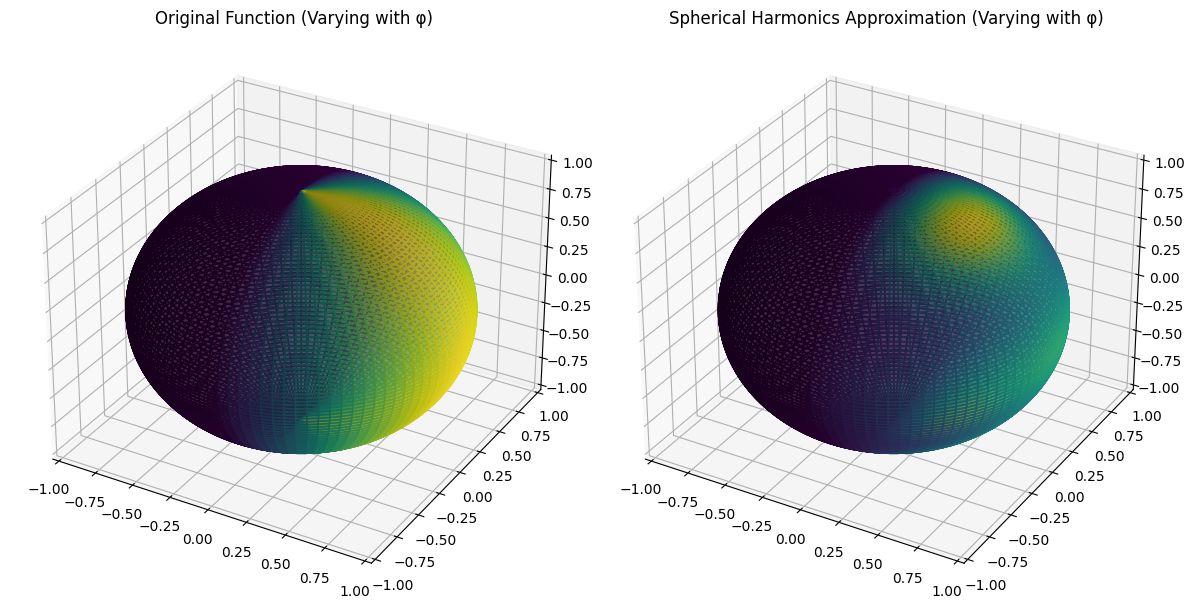

In [18]:
# Re-importing necessary libraries and redefining variables and functions after code execution state reset
import numpy as np
from scipy.special import sph_harm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the grid in spherical coordinates
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)
phi, theta = np.meshgrid(phi, theta)
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Redefining the spherical function to vary with the azimuthal angle (phi)
# New function: f(theta, phi) = cos(phi)
f_phi_varied = np.cos(phi)

# Degree for spherical harmonics approximation
degree = 5

# Recompute spherical harmonics approximation for the new function
approximation_phi_varied = np.zeros_like(f_phi_varied)
for l in range(degree+1):
    for m in range(-l, l+1):
        Y_lm = sph_harm(m, l, phi, theta)  # Compute spherical harmonic
        # Compute coefficient (consider only the real part of Y_lm)
        coefficient = np.sum(Y_lm.real * f_phi_varied) / np.sum(Y_lm.real * Y_lm.real)
        approximation_phi_varied += coefficient * Y_lm.real  # Add to approximation (real part only)

# Plotting
fig = plt.figure(figsize=(12, 6))

# Original function (varying with azimuthal angle)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.viridis(f_phi_varied/f_phi_varied.max()), alpha=0.6)
ax1.set_title('Original Function (Varying with φ)')
ax1.set_xlim([-1,1])
ax1.set_ylim([-1,1])
ax1.set_zlim([-1,1])

# Spherical Harmonics Approximation
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.viridis(approximation_phi_varied/np.max(approximation_phi_varied)), alpha=0.6)
ax2.set_title('Spherical Harmonics Approximation (Varying with φ)')
ax2.set_xlim([-1,1])
ax2.set_ylim([-1,1])
ax2.set_zlim([-1,1])

plt.tight_layout()
plt.show()


# HARMONIC ANALYSIS

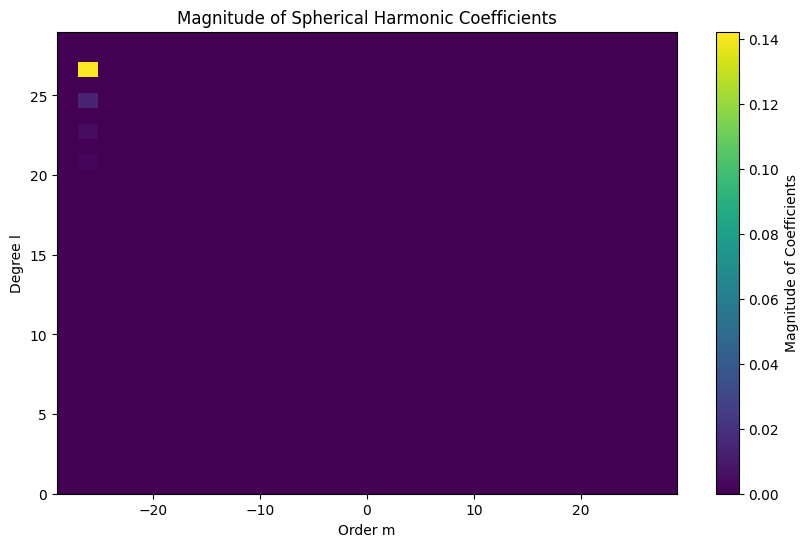

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pyshtools

# Define the maximum degree of spherical harmonics
degrees = 30

# Create a sample grid (latitude-longitude grid)
lats = np.linspace(90, -90, 2 * degrees + 1)
lons = np.linspace(0, 360, 2 * degrees + 1, endpoint=False)
lons, lats = np.meshgrid(lons, lats)
colats = 90 - lats

# Create some synthetic data on this grid
data = np.cos(colats * np.pi / 180) * np.cos(lons * np.pi / 180)

# Convert the data to a SHGrid object
grid = pyshtools.SHGrid.from_array(data)

# Expand the grid to spherical harmonic coefficients
coeffs = grid.expand()

# Extract the coefficients
clm = coeffs.to_array()

# Calculate the magnitudes (sum of the squares of real and imaginary parts)
lmax = coeffs.lmax
magnitudes = np.sum(np.abs(clm)**2, axis=0)  # Summing squares of real and imaginary parts

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(magnitudes, extent=(-lmax, lmax, 0, lmax), aspect='auto')
plt.colorbar(label='Magnitude of Coefficients')
plt.xlabel('Order m')
plt.ylabel('Degree l')
plt.title('Magnitude of Spherical Harmonic Coefficients')
plt.show()


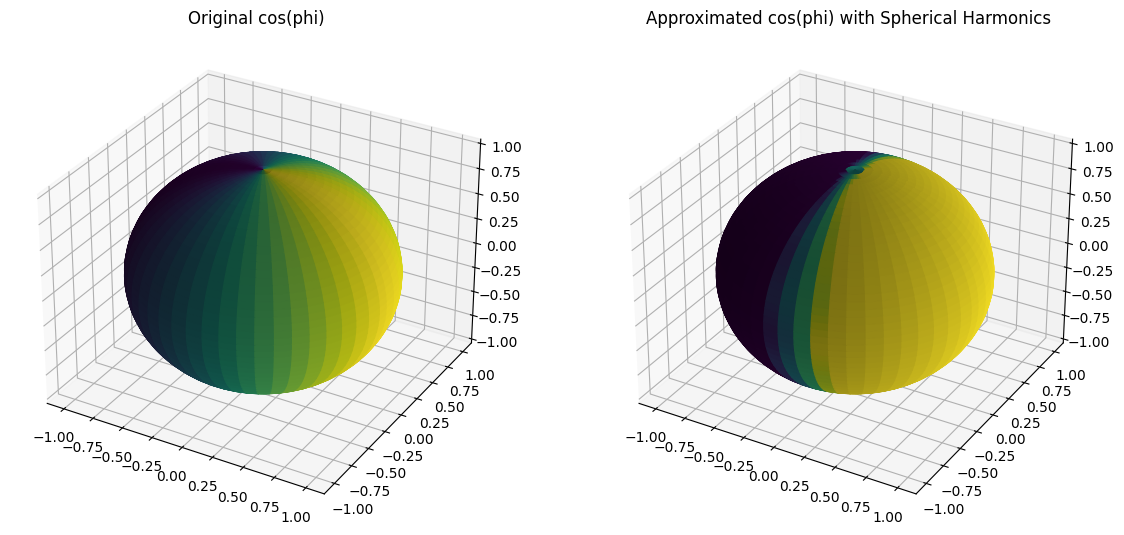

In [4]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def cos_phi(phi):
    """
    Define the cos(phi) function.
    """
    return np.cos(phi)
def compute_spherical_harmonics_coefficients(l_max):
    """
    Compute the coefficients of the spherical harmonics expansion.
    Corrected to handle indices properly.
    """
    # Adjust the size of the coefficients array to accommodate the range of m
    coefficients = np.zeros((l_max+1, 2*l_max+1), dtype=complex)

    # Integration over phi and theta
    for l in range(l_max + 1):
        for m in range(-l, l + 1):
            integral = 0
            for phi in np.linspace(0, 2 * np.pi, 100):
                for theta in np.linspace(0, np.pi, 100):
                    Y_lm = sp.sph_harm(m, l, phi, theta)
                    integral += cos_phi(phi) * Y_lm * np.sin(theta)

            integral *= (np.pi / 50) * (2 * np.pi / 50)  # dtheta and dphi
            coefficients[l, m + l] = integral

    return coefficients

def approximate_function(l_max, coefficients, phi, theta):
    """
    Reconstruct the function using the spherical harmonics expansion.
    Corrected to handle indices properly.
    """
    approximation = np.zeros(phi.shape, dtype=complex)
    for l in range(l_max + 1):
        for m in range(-l, l + 1):
            Y_lm = sp.sph_harm(m, l, phi, theta)
            approximation += coefficients[l, m + l] * Y_lm

    return approximation

l_max = 10  # Maximum degree of spherical harmonics

# Compute coefficients again with the corrected function
coefficients = compute_spherical_harmonics_coefficients(l_max)

# Create a grid for phi and theta
phi = np.linspace(0, 2 * np.pi, 200)
theta = np.linspace(0, np.pi, 200)
phi, theta = np.meshgrid(phi, theta)

# Approximate the function on the grid
approximation = approximate_function(l_max, coefficients, phi, theta)

# Plotting the original and approximated function for comparison
fig = plt.figure(figsize=(14, 7))

# Original function plot
ax1 = fig.add_subplot(121, projection='3d')
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)
ax1.plot_surface(x, y, z, facecolors=plt.cm.viridis((cos_phi(phi) + 1)/2))
ax1.set_title("Original cos(phi)")

# Approximated function plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z, facecolors=plt.cm.viridis((approximation.real + 1)/2))
ax2.set_title("Approximated cos(phi) with Spherical Harmonics")

plt.show()

